In [1]:
# Последовательная модель нейронной сети
from tensorflow.keras.models import Sequential

# Слои нейронной сети
from tensorflow.keras.layers import Dense, Flatten, Dropout, Embedding

# Преобразование ответов в One-Hot-Encoding
from tensorflow.keras import utils

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAX_WORDS = 10000
MAX_LEN = 100

In [3]:
!wget https://www.dropbox.com/s/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz?dl=1 -O yelp_review_polarity_csv.tgz

--2021-05-24 12:50:35--  https://www.dropbox.com/s/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz [following]
--2021-05-24 12:50:35--  https://www.dropbox.com/s/dl/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc58e1fa6bbc6ed8eef1789d6ac4.dl.dropboxusercontent.com/cd/0/get/BPESztowUl_ufMGYMDAhq7t2bcvd5xClHnVrmFWpwAjJkzlkFKpM4OCXRwyIYL98Nmf4f9vwMATNbowyC76VyL7Pc362q5IcE_kFfF35H2E7JQ3ieheXe1i6rLwdrbpMKbWvP1rj3Ntm_PwAaMDbJYjh/file?dl=1# [following]
--2021-05-24 12:50:36--  https://uc58e1fa6bbc6ed8eef1789d6ac4.dl.dropboxusercontent.com/cd/0/get/BPESztowUl_ufMGYMDAhq7t2bcvd5xClHnVrmFWp

In [4]:
!tar -xvf yelp_review_polarity_csv.tgz

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


In [5]:
# Как увидел нету название столбцов
train = pd.read_csv('yelp_review_polarity_csv/train.csv', header=None, names=['Class', 'Review'])

In [6]:
train

,Class,Review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


In [7]:
# Перевод целевой переменной в 0 и 1
y_train = train['Class'] - 1

In [9]:
reviews = train['Review']

In [8]:
tokenizer = Tokenizer(num_words=MAX_WORDS)

In [10]:
tokenizer.fit_on_texts(reviews)

In [ ]:
tokenizer.word_index

In [13]:
# Присваиваем каждому слову номер
sequences = tokenizer.texts_to_sequences(reviews)

In [19]:
# Приводим вектор к одному размеру
x_train = pad_sequences(sequences, maxlen=MAX_LEN)

In [20]:
model = Sequential()
model.add(Embedding(MAX_WORDS, 64, input_length=MAX_LEN))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [21]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

Epoch 1/5
3938/3938 [==============================] - 117s 30ms/step - loss: 0.2694 - accuracy: 0.8843 - val_loss: 0.1752 - val_accuracy: 0.9331
Epoch 2/5
3938/3938 [==============================] - 116s 29ms/step - loss: 0.1778 - accuracy: 0.9317 - val_loss: 0.1847 - val_accuracy: 0.9284
Epoch 3/5
3938/3938 [==============================] - 116s 29ms/step - loss: 0.1008 - accuracy: 0.9628 - val_loss: 0.2339 - val_accuracy: 0.9205
Epoch 4/5
3938/3938 [==============================] - 116s 30ms/step - loss: 0.0501 - accuracy: 0.9819 - val_loss: 0.3490 - val_accuracy: 0.9113
Epoch 5/5
3938/3938 [==============================] - 116s 29ms/step - loss: 0.0325 - accuracy: 0.9884 - val_loss: 0.3943 - val_accuracy: 0.9094


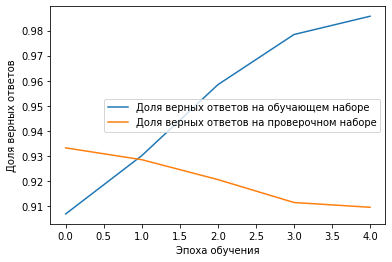

In [22]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Проверка на тестовом наборе

In [23]:
test = pd.read_csv('yelp_review_polarity_csv/test.csv', 
                    header=None, 
                    names=['Class', 'Review'])

In [24]:
test_sequences = tokenizer.texts_to_sequences(test['Review'])

In [25]:
x_test = pad_sequences(test_sequences, maxlen=MAX_LEN)

In [26]:
y_test = test['Class'] - 1

In [27]:
model.evaluate(x_test, y_test, verbose=1)

1188/1188 [==============================] - 3s 2ms/step - loss: 0.4523 - accuracy: 0.8966


[0.4522826373577118, 0.8965526223182678]

In [28]:
text = ''' The SmartBurger restaurant is awful. It’s a small shabby place. 
The food is really bad and very expensive.  The host and waiters are rude. 
I will never visit the SmartBurger again! '''

In [29]:
sequence = tokenizer.texts_to_sequences([text])

In [30]:
data = pad_sequences(sequence, maxlen=MAX_LEN)

In [31]:
result = model.predict(data)

In [32]:
result

array([[1.6747317e-05]], dtype=float32)

In [33]:
if result[[0]] < 0.5:
    print('Отзыв отрицательный')
else:
    print('Отзыв положительный')

Отзыв отрицательный
